# Video Games Analysis

In [1]:
import pandas as pd

#movies = pd.read_csv('/Users/chrisraddatz/imdb-videogames.csv') #For mac

movies = pd.read_csv(r'C:\Users\Chris\Downloads\imdb-videogames.csv') #For windows

import warnings
warnings.filterwarnings('ignore')

# Quick overview of dataset and removing some unnecessary columns

In [2]:
movies.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


There's a column that serves as index, we don't need that. Other columns that don't seem very relevant to visualization/analysis are:
- Url
- Plot

In [3]:
movies.columns

Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [4]:
drop_cols = ['Unnamed: 0', 'url', 'plot']
movies.drop(columns = drop_cols, inplace = True)

### General Info

In [5]:
print(movies.shape)
print(movies.info())

(20803, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         20803 non-null  object 
 1   year         20536 non-null  float64
 2   certificate  7903 non-null   object 
 3   rating       11600 non-null  float64
 4   votes        11600 non-null  object 
 5   Action       20803 non-null  bool   
 6   Adventure    20803 non-null  bool   
 7   Comedy       20803 non-null  bool   
 8   Crime        20803 non-null  bool   
 9   Family       20803 non-null  bool   
 10  Fantasy      20803 non-null  bool   
 11  Mystery      20803 non-null  bool   
 12  Sci-Fi       20803 non-null  bool   
 13  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), object(3)
memory usage: 995.6+ KB
None


In [6]:
movies.head()

,name,year,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018.0,T,9.2,"20,759",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,M,9.7,"35,703",True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,M,9.5,"59,986",True,False,False,True,False,False,False,False,False
3,God of War,2018.0,M,9.6,"26,118",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,T,9.5,"28,722",True,True,False,False,False,False,False,False,False


I think there are some good routes to look for analysis within this dataset. Here are some ideas:
1. Look at the flux of votes or ratings over years
2. Identify which categories are most popular via votes/ratings
3. Identify possible trends between certificates and ratings/votes

Let's first get a view at how the data might be entered and see if any null values are present.

### Cleaning

In [7]:
for c in movies.columns:
    counts = movies[c].isnull().value_counts()
    print("The number of null values within this columns is: {}\n".format(counts))

The number of null values within this columns is: False    20803
Name: name, dtype: int64

The number of null values within this columns is: False    20536
True       267
Name: year, dtype: int64

The number of null values within this columns is: True     12900
False     7903
Name: certificate, dtype: int64

The number of null values within this columns is: False    11600
True      9203
Name: rating, dtype: int64

The number of null values within this columns is: False    11600
True      9203
Name: votes, dtype: int64

The number of null values within this columns is: False    20803
Name: Action, dtype: int64

The number of null values within this columns is: False    20803
Name: Adventure, dtype: int64

The number of null values within this columns is: False    20803
Name: Comedy, dtype: int64

The number of null values within this columns is: False    20803
Name: Crime, dtype: int64

The number of null values within this columns is: False    20803
Name: Family, dtype: int64

The numb

So all the binary columns seem to be filled in which is great, for the other columns some of them have over half being null, let's not remove those just yet, as that would take out a large portion of the data. But I'd say we can take out null values in "year" as it's only 267 counts. 

In [8]:
movies = movies[movies.year.isnull() != True]

I also want to change the binary columns to actual binary rather than true and false.

In [9]:
for i in movies.columns[5:]:
    movies[i] = movies[i].astype(int)

Now let's look at segmenting the data, before we do our visualizations.

# Goal 1: Identify differences across time

In [10]:
pd.set_option("display.max_rows", None) #So we can see all of the values
movies['year'].value_counts()

2019.0    956
2018.0    872
2017.0    863
2016.0    828
2015.0    761
2020.0    721
2021.0    704
2013.0    670
2014.0    662
2012.0    631
2011.0    592
2010.0    548
2009.0    542
2006.0    522
2003.0    507
2002.0    502
1994.0    488
2004.0    486
2005.0    485
2008.0    480
2001.0    480
2007.0    475
2000.0    453
1999.0    448
1995.0    440
1993.0    438
1996.0    436
2022.0    422
1998.0    409
1997.0    383
1992.0    365
1991.0    313
1990.0    282
1989.0    251
1982.0    231
1983.0    225
1987.0    209
1988.0    207
1986.0    194
1984.0    176
1981.0    165
1985.0    153
1980.0    112
1975.0     83
1979.0     82
1978.0     73
2023.0     53
1977.0     53
1976.0     29
1972.0     18
1973.0     15
2024.0     13
1974.0     13
1971.0      5
2025.0      3
1970.0      2
1969.0      2
1962.0      2
1952.0      1
1964.0      1
2027.0      1
Name: year, dtype: int64

In [11]:
movies['year'] = movies['year'].astype(int)#To get rid of the .0 at end of each value

In [12]:
before_70s = movies[movies.year < 1970]
_70s = movies.copy(
)[(movies['year'] >= 1970) & (movies['year'] < 1980)]
_80s = movies.copy(
)[(movies['year'] >= 1980) & (movies['year'] < 1990)]
_90s = movies.copy(
)[(movies['year'] >= 1990) & (movies['year'] < 2000)]
_00s = movies.copy(
)[(movies['year'] >= 2000) & (movies['year'] < 2010)]
_current = movies[movies.year >= 2010]
#bush = all_three.copy(
#)[(all_three['Time'].dt.year >= 2001) & (all_three['Time'].dt.year < 2009)]

Just from looking at the 70s movies, it seems that a lot of the data has null values represented. This fills in the question as to why so much of the data had null values: it's outdated.

In [14]:
data_frames = [before_70s, _70s, _80s, _90s, _00s, _current]
years = ["Before 1970s","1970s", "1980s","1990s","2000s","Last Decade"]
for data, year in zip(data_frames, years):
    print("\033[1m{}\033[0m\nNumber of Games Represented:{}\nAverage Rating: {:.2f}\n".format(year,len(data['rating']),data['rating'].mean()))

Before 1970s
Number of Games Represented:6
Average Rating: 6.92

1970s
Number of Games Represented:373
Average Rating: 5.15

1980s
Number of Games Represented:1923
Average Rating: 6.38

1990s
Number of Games Represented:4002
Average Rating: 7.05

2000s
Number of Games Represented:4932
Average Rating: 7.17

Last Decade
Number of Games Represented:9300
Average Rating: 7.13



### Visualizing Votes and Ratings by Decade

In [15]:
import numpy as np

movies.loc[movies['year'] < 1970, 'decade'] = 1960
movies.loc[(movies['year'] >= 1970) & (movies["year"] < 1980), 'decade'] = 1970
movies.loc[(movies['year'] >= 1980) & (movies["year"] < 1990), 'decade'] = 1980
movies.loc[(movies['year'] >= 1990) & (movies["year"] < 2000), 'decade'] = 1990
movies.loc[(movies['year'] >= 2000) & (movies["year"] < 2010), 'decade'] = 2000
movies.loc[movies['year'] >= 2010, 'decade'] = 2010

#df.loc[df["gender"] == "male", "gender"] = 1
#df["gender"] = np.where(df["gender"] == "female", 0, 1)

In [16]:
movies['decade'].value_counts()

2010.0    9300
2000.0    4932
1990.0    4002
1980.0    1923
1970.0     373
1960.0       6
Name: decade, dtype: int64

In [17]:
movies['decade'] = movies['decade'].astype(int)

In [18]:
movies.head()

,name,year,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,decade
0,Spider-Man,2018,T,9.2,"20,759",1,1,0,0,0,1,0,0,0,2010
1,Red Dead Redemption II,2018,M,9.7,"35,703",1,1,0,1,0,0,0,0,0,2010
2,Grand Theft Auto V,2013,M,9.5,"59,986",1,0,0,1,0,0,0,0,0,2010
3,God of War,2018,M,9.6,"26,118",1,1,0,0,0,0,0,0,0,2010
4,Uncharted 4: A Thief's End,2016,T,9.5,"28,722",1,1,0,0,0,0,0,0,0,2010


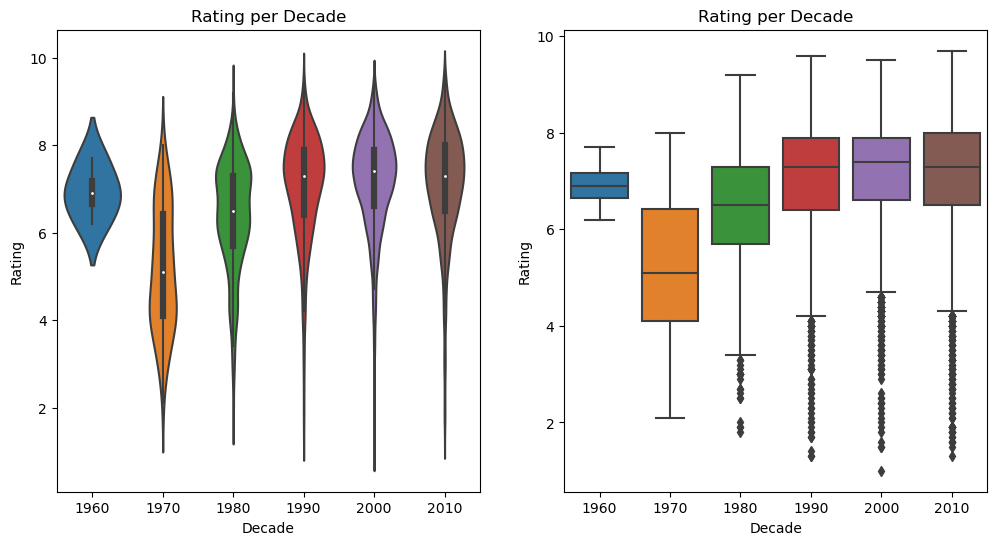

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
ax1 = sns.violinplot(data = movies, x = 'decade', y='rating')
ax1.set(xlabel = 'Decade', ylabel = 'Rating', title = 'Rating per Decade')

plt.subplot(1,2,2)
ax2 = sns.boxplot(data = movies, x = 'decade', y = 'rating')
ax2.set(xlabel = 'Decade', ylabel = 'Rating', title = 'Rating per Decade')
plt.show()

I've tried doing a visualization like this for votes, but it looks messy. One way to counteract this that I've seen online is to take a log form of the value to normalize things.. 
First we need to get rid of the comma in games that have thousands of votes.

In [20]:
movies['votes'] = movies['votes'].replace(',','', regex=True)

In [21]:
movies['votes'] = movies['votes'].astype(float) #Kept getting error when trying to make it log10, this eliminated the error.
movies['log_votes'] = np.log10(movies['votes'])

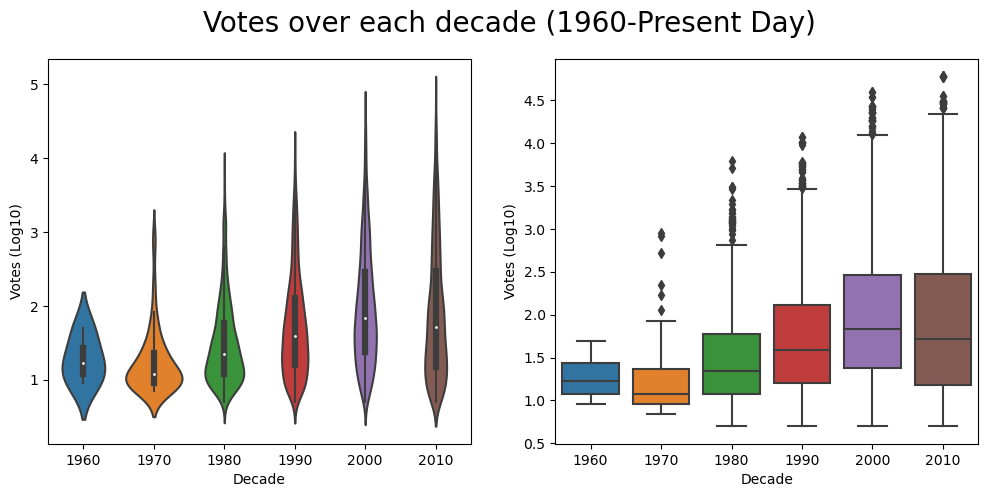

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ax1 = sns.violinplot(data = movies, x = 'decade', y='log_votes')
ax1.set(xlabel = 'Decade', ylabel = 'Votes (Log10)')

plt.subplot(1,2,2)
ax2 = sns.boxplot(data = movies, x = 'decade', y = 'log_votes')
ax2.set(xlabel = 'Decade',ylabel = 'Votes (Log10)')

plt.text(s = "Votes over each decade (1960-Present Day)", x = -5.5, y = 5.3, fontsize = 20)
plt.show()

I like to include both violin and boxplot as I think sometimes the quartiles are a bit hard to see for violin plots

From this we see that over time there may have been a general increase in ratings and votes, but not a particularly significant trend. 

# Goal 2: Identify Best/Popular Categories
With the numerical category columns describing how each game is characterized, we can perform correlation tests to see which genres correlate to higher ratings (better games) and also higher votes, meaning more popular if we use the assumption that more votes = more popular.

In [23]:
movies.columns

Index(['name', 'year', 'certificate', 'rating', 'votes', 'Action', 'Adventure',
       'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller',
       'decade', 'log_votes'],
      dtype='object')

Find what we should expect to see first, and then run the test. 

In [24]:
cat_counts = {}
for i in movies.columns[5:14]:
    sum_count = 0
    sum_count = np.sum(movies[i])
    
    cat_counts[i] = sum_count
df1 = pd.DataFrame(cat_counts, index = ['Count'])
df1

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
Count,11822,10218,1771,885,2858,4295,1169,3525,512


Action and Adventure are the most represented genres within the dataset, which could be because action and adventure are genres that get thrown around at lots of games. 

In [25]:
rating_correlations_100 = {}
rating_correlations = []

for i in movies.columns[5:14]:
    correlation = movies[i].corr(movies['rating'])
    rating_correlations_100[i] = int(correlation * 100)
    rating_correlations.append(correlation)

df2 = pd.DataFrame(rating_correlations_100, index = ['Ratings Correlation'])
df2

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
Ratings Correlation,2,18,3,5,-11,10,8,-3,0


In [26]:
votes_correlations_100 = {}
votes_correlations = []

for i in movies.columns[5:14]:
    correlation = movies[i].corr(movies['votes'])
    votes_correlations_100[i] = int(correlation * 100)
    votes_correlations.append(correlation)

df3 = pd.DataFrame(votes_correlations_100, index = ['Votes Correlation'])
df3

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
Votes Correlation,10,7,-2,12,-5,0,0,-2,4


In [27]:
dataframes = [df1,df2,df3]
df = pd.concat(dataframes)
df

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
Count,11822,10218,1771,885,2858,4295,1169,3525,512
Ratings Correlation,2,18,3,5,-11,10,8,-3,0
Votes Correlation,10,7,-2,12,-5,0,0,-2,4


In [28]:
rating_correlations

[0.026077297955945693,
 0.18510840099260786,
 0.037501860143787175,
 0.05386377118700307,
 -0.1157254806670859,
 0.10011444862180058,
 0.08380426586703298,
 -0.037155015237568215,
 0.00869710749402989]

In [29]:
votes_correlations

[0.10831362203449156,
 0.07327816916250024,
 -0.025133679519050954,
 0.1270528632229728,
 -0.054251111743535974,
 -0.004538202984452845,
 0.0007070541466052895,
 -0.0200636639519506,
 0.04174625500424054]

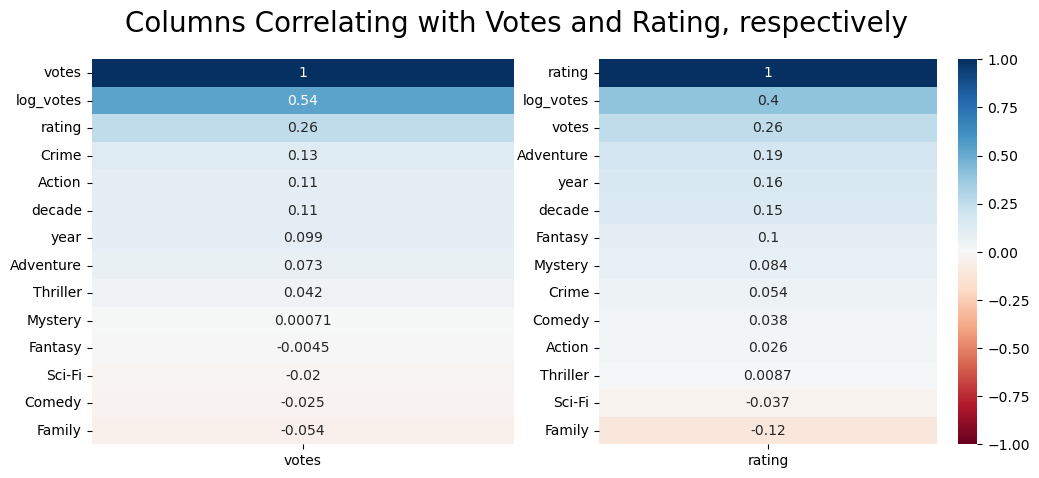

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
heatmap_1 = sns.heatmap(movies.corr()[['votes']].sort_values(by='votes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdBu', cbar = False)

plt.subplot(1,2,2)
heatmap_2 = sns.heatmap(movies.corr()[['rating']].sort_values(by='rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdBu')

plt.text(s = "Columns Correlating with Votes and Rating, respectively", x = -1.4, y = -1,  fontsize = 20)
plt.show()

### Genres with significant Ratings Correlation:
- Positive
    - Adventure
    - Fantasy
    - Mystery
- Negative
    - Family

### Genres with significant Votes Correlation:
- Positive
    - Action
    - Adventure
    - Crime
- Negative
    - Family
   
So it seems that Adventure is one of the most beloved genres across all these decades, as fans continously rate it well and in high quantities. The family genre appears to be very poorly received, as it shows significant negative correlation between votes and ratings. 

# Goal 3: Identify possible trends between certificates and ratings/votes

For every game made, there must be a certificate assigned for consumer guidance on what to expect within the gameplay. Most games fall under an E rating, E for everyone. This means the game displays and exhibits qualities that not only an adult could entertain themselves with, but also a 5-year-old kid. 

In this section, we will analyze how each certificate is viewed critically, by ratings, and by our assumption that votes = popularity.

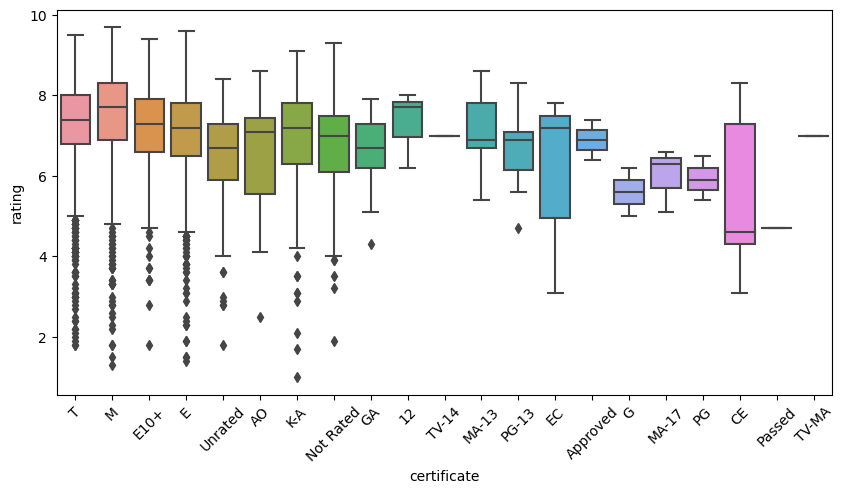

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

sns.boxplot(movies['certificate'], movies['rating'])

plt.xticks(rotation = 45)
plt.show()

In [32]:
excised_certificates = movies[movies['certificate'] != 'TV-MA']
excised_certificates = excised_certificates[excised_certificates['certificate'] != 'Passed']
excised_certificates = excised_certificates[excised_certificates['certificate'] != 'TV-14']

Remove outliers from those with the most observable outliers from the boxplot (just makes it look a little better):
- T
- M
- E
- E10+
- K-A

In [36]:
t_outlier = excised_certificates[
    (excised_certificates['rating'] < 5) &
    (excised_certificates['certificate'] == 'T')]

m_outlier = excised_certificates[
    (excised_certificates['rating'] < 4.5) &
    (excised_certificates['certificate'] == 'M')]

e_outlier = excised_certificates[
    (excised_certificates['rating'] < 4.5) &
    (excised_certificates['certificate'] == 'E')]

e10_outlier = excised_certificates[
    (excised_certificates['rating'] < 4.5) &
    (excised_certificates['certificate'] == 'E10+')]

ka_outlier = excised_certificates[
    (excised_certificates['rating'] < 4.5) &
    (excised_certificates['certificate'] == 'K-A')]

In [37]:
for i in [t_outlier, m_outlier, e_outlier, e10_outlier, ka_outlier]:
    excised_certificates = excised_certificates.drop(i.index)

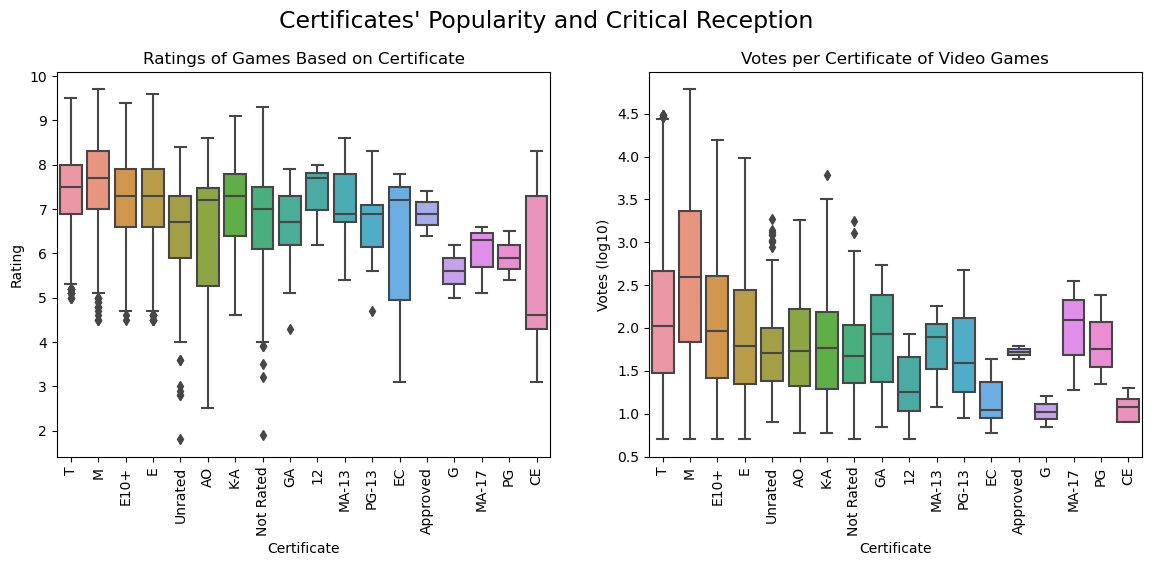

In [106]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.boxplot(excised_certificates['certificate'], excised_certificates['rating'])
plt.xticks(rotation = 90)
plt.title('Ratings of Games Based on Certificate')
plt.ylabel('Rating')
plt.xlabel('Certificate')

plt.subplot(1,2,2)
sns.boxplot(excised_certificates['certificate'], excised_certificates['log_votes'])
plt.xticks(rotation = 90)
plt.ylabel('Votes (log10)')
plt.xlabel('Certificate')
plt.title('Votes per Certificate of Video Games')

plt.text(s = "Certificates' Popularity and Critical Reception", x = -14, y = 5.5,  fontsize = 17)
plt.show()

Let's look at the number of games that these certificates are represented by, as low counts may be swaying this visual and giving a false representation of how popular they actually are. 

In [83]:
counts = pd.DataFrame(excised_certificates['certificate'].value_counts())
counts

,certificate
T,2389
E,1971
M,1780
E10+,805
Unrated,241
K-A,215
Not Rated,179
AO,32
EC,25
GA,25


#### Removing Certificates with less than 100 games

So it appears that many of them have less than 100 actual counts, let's remove those and look at our visual again.

In [98]:
low_counts = ['AO','EC','GA','CE','12','PG-13','MA-13','Approved','G','MA-17','PG']
high_counts = excised_certificates.copy()
for i in low_counts:
    high_counts = high_counts[high_counts['certificate'] != i]

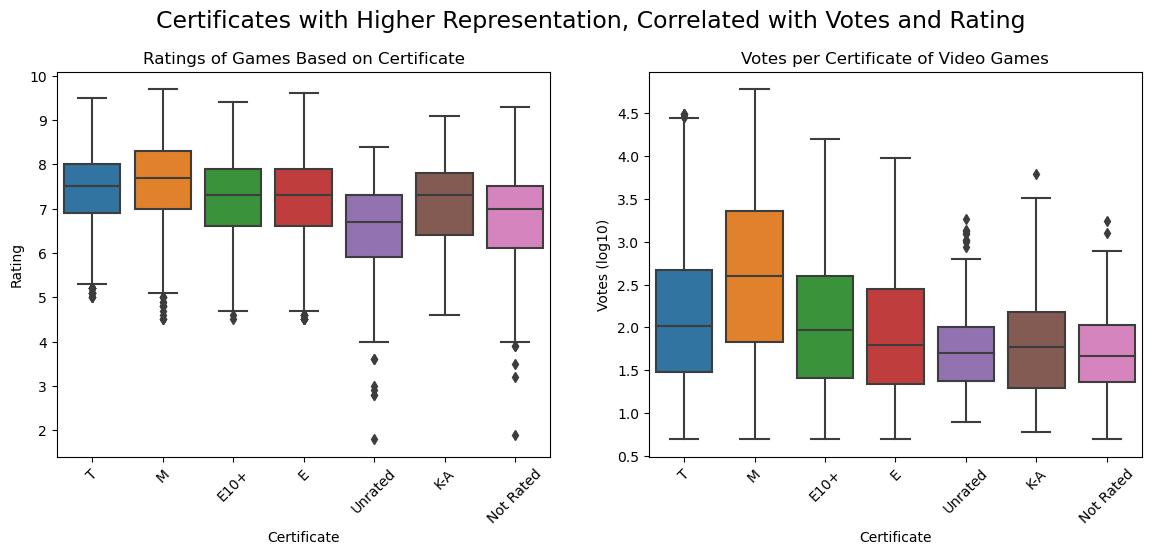

In [111]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.boxplot(high_counts['certificate'], high_counts['rating'])
plt.xticks(rotation = 45)
plt.title('Ratings of Games Based on Certificate')
plt.ylabel('Rating')
plt.xlabel('Certificate')

plt.subplot(1,2,2)
sns.boxplot(high_counts['certificate'], high_counts['log_votes'])
plt.xticks(rotation = 45)
plt.ylabel('Votes (log10)')
plt.xlabel('Certificate')
plt.title('Votes per Certificate of Video Games')

plt.text(s = "Certificates with Higher Representation, Correlated with Votes and Rating", x = -7.5, y = 5.5,  fontsize = 17)
plt.show()

From this we see that Mature games typically received the most amount of votes, and were also rated quite well. In addition, we saw that "M" was the 3rd most represented certificate within the dataset, further adding to it's popularity and high-performance. 